In [1]:
from uncertain_dp2 import *

In [2]:
from pot_correction import *

In [3]:
import random
#random.seed(1)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
DNA_LENGTH = 50           
READ_lENGTH = 35
READ_COUNT = 10

PROBABILISTIC_ALIGNMENT_BONUS = 2
NORMAL_ALIGNMENT_BONUS = 0.7

ALIGNMENT_BONUS = PROBABILISTIC_ALIGNMENT_BONUS

In [6]:
dna = generate_dna(DNA_LENGTH)
reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]

In [7]:
reads[0].uncertain_text[0]

[0.6735958798043165, 0.0, 0.3264041201956835, 0.0]

In [8]:
check_dna_distance_error_rate_suitable(dna, reads, alignment_bonus=ALIGNMENT_BONUS)

In [9]:
[print_read_intendet_errors(r,alignment_bonus=ALIGNMENT_BONUS) for r in reads]

             XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
           XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
   XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
       XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
         XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
        XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
       XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...


[None, None, None, None, None, None, None, None, None, None]

In [10]:
corrected_reads = correct_reads_with_consens(reads,probabilistic=False, alignment_bonus=ALIGNMENT_BONUS)
[print_read_intendet_errors(r,alignment_bonus=ALIGNMENT_BONUS) for r in corrected_reads]

             XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
           XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
   XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
       XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...
         XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
        XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
       XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


[None, None, None, None, None, None, None, None, None, None]

In [11]:
print(
f"                         before after\n"+\
f"local edit distance      {most_likely_restorer_error_rate(reads, alignment_bonus=ALIGNMENT_BONUS):.3f} {most_likely_restorer_error_rate(corrected_reads,alignment_bonus=ALIGNMENT_BONUS):.3f}\n"+\
f"arbitrary dna alignment  {dna_distance_error_rate(dna, reads, alignment_bonus=ALIGNMENT_BONUS):.3f} {dna_distance_error_rate(dna, corrected_reads, alignment_bonus=ALIGNMENT_BONUS):.3f}")

                         before after
local edit distance      0.137 0.054
arbitrary dna alignment  0.146 0.060


[0.12857142857142856, 0.12285714285714286, 0.12857142857142856, 0.1742857142857143] [0.05714285714285714, 0.02, 0.02857142857142857, 0.06285714285714286] [0.0, 0.05714285714285714, 0.04285714285714286, 0.02857142857142857]


<BarContainer object of 3 artists>

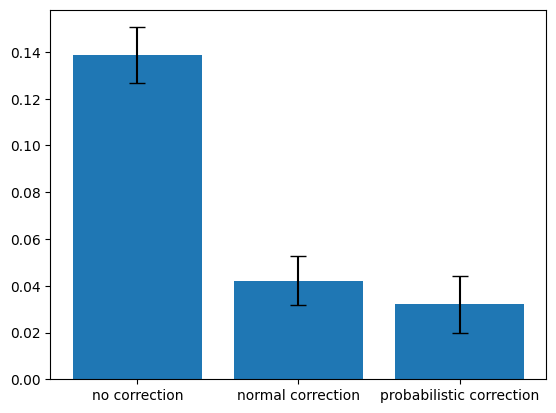

In [12]:

before_correction = []
normal_correction = []
probabilistic_correction = []

for i in range(4):

    dna = generate_dna(DNA_LENGTH)
    reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]

    corrected_reads = correct_reads_with_consens(reads,probabilistic=False, alignment_bonus=NORMAL_ALIGNMENT_BONUS)
    probabilistic_corrected_reads = correct_reads_with_consens(reads,probabilistic=True, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS)

    before_correction.append(dna_distance_error_rate(dna, reads, alignment_bonus=NORMAL_ALIGNMENT_BONUS))
    normal_correction.append(dna_distance_error_rate(dna, corrected_reads, alignment_bonus=NORMAL_ALIGNMENT_BONUS))
    probabilistic_correction.append(dna_distance_error_rate(dna, probabilistic_corrected_reads, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS))

print(before_correction, normal_correction, probabilistic_correction)


plt.bar(
    ["no correction", "normal correction", "probabilistic correction"],
    [np.mean(before_correction), np.mean(normal_correction), np.mean(probabilistic_correction)],
    yerr=[pd.Series(before_correction).sem(),pd.Series(normal_correction).sem(), pd.Series(probabilistic_correction).sem()],
    capsize=6
    )
#plt.ylim(0,0.02)


In [13]:
def compare_and_plot(read_correctors: list[t.Callable[[list[Read]],list[Read]]],*, names: list[str]=None,  iterations=4):
    if names is None:
        names = [str(i) for i in range(len(read_correctors))]

    all: list[list[float]] = [[] for _ in read_correctors]
    for _ in range(iterations):

        dna = generate_dna(DNA_LENGTH)
        reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]

        for j, corrector in enumerate(read_correctors):
            corrected_reads = corrector(reads)
            all[j].append(dna_distance_error_rate(dna, corrected_reads, alignment_bonus=NORMAL_ALIGNMENT_BONUS))


    plt.bar(
        names,
        [np.mean(measurement_row) for measurement_row in all],
        yerr=[pd.Series(measurement_row).sem() for measurement_row in all],
        capsize=6
    )


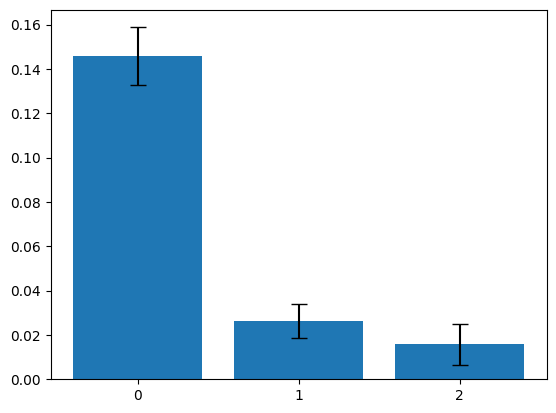

In [14]:
compare_and_plot(
    [
        lambda reads: reads,
        lambda reads: correct_reads_with_consens(reads,probabilistic=False, alignment_bonus=NORMAL_ALIGNMENT_BONUS),
        lambda reads: correct_reads_with_consens(reads,probabilistic=True, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS)
    ],
    names=["no correction","normal correction", "probabilistic correction"],
    iterations=4
)

In [15]:
# boni = [0.2,0.4,0.6,0.8,1]
# data = [[] for _ in range(len(boni))]
# 
# 
# for i in range(4):
    # dna = generate_dna(DNA_LENGTH)
    # reads = [generate_read(dna, READ_lENGTH, lambda base: gauss_unsharp_uncertainty_generator(base, 0.47)) for _ in range(READ_COUNT)]
    #probabilistic_corrected_reads = correct_reads_with_consens(reads,probabilistic=True, alignment_bonus=PROBABILISTIC_ALIGNMENT_BONUS)
    # for j in range(len(boni)):
        # corrected_reads = correct_reads_with_consens(reads, probabilistic=False, alignment_bonus=boni[j])
        # data[j].append(dna_distance_error_rate(dna, corrected_reads, alignment_bonus=boni[j]))
# 
# data

In [16]:
# plt.bar(
    # [str(b) for b in boni],
    # [np.mean(boni_data) for boni_data in data],
    # yerr=[pd.Series(boni_data).sem() for boni_data in data],
    # capsize=6
    # )